In [1]:
 import numpy as np
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl


# mpl.style.use('mystyle.mplstyle')
path = pl.Path.home()/ 'Transfer_Learning_GP_Results'
fig_path = pl.Path.home()/'Transfer_Learning_GP_Results/opt_plots'

In [2]:
surface_types = ['unrelated', 'non-linear_relation', 'linear_relation']
# surface_type = 'unrelated_two_observed_10_new' #'non-linear_relation_two_observed_six_new' #'linear_relation' #'unrelated' #'non-linear_relation'
results_list = []
for n_new_points in range(2,30):
    for surface_type in surface_types:
        for seed in [1, 2, 3]:
            for restarts in [1, 2, 3]:
                # print(path/f'hyperparameters/hyperparameters_{surface_type}_{n_new_points}_points_seed_{seed}.pkl')
                if os.path.exists(path/f'hyperparameters/hyperparameters_{surface_type}_two_observed_10_new_{n_new_points}_points_seed_{seed}.pkl'):
                    with open(path/f'hyperparameters/hyperparameters_{surface_type}_two_observed_10_new_{n_new_points}_points_seed_{seed}.pkl', 'rb') as f:
                        df = pickle.load(f)
                        df['n_new_points'] = n_new_points
                        df['seed'] = seed
                        df['surface_type'] = surface_type
                        results_list.append(df)

2023-05-25 14:23:21.472532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 14:23:22.421065: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
results_df = pd.concat(results_list)

Plot the optimisation of the models

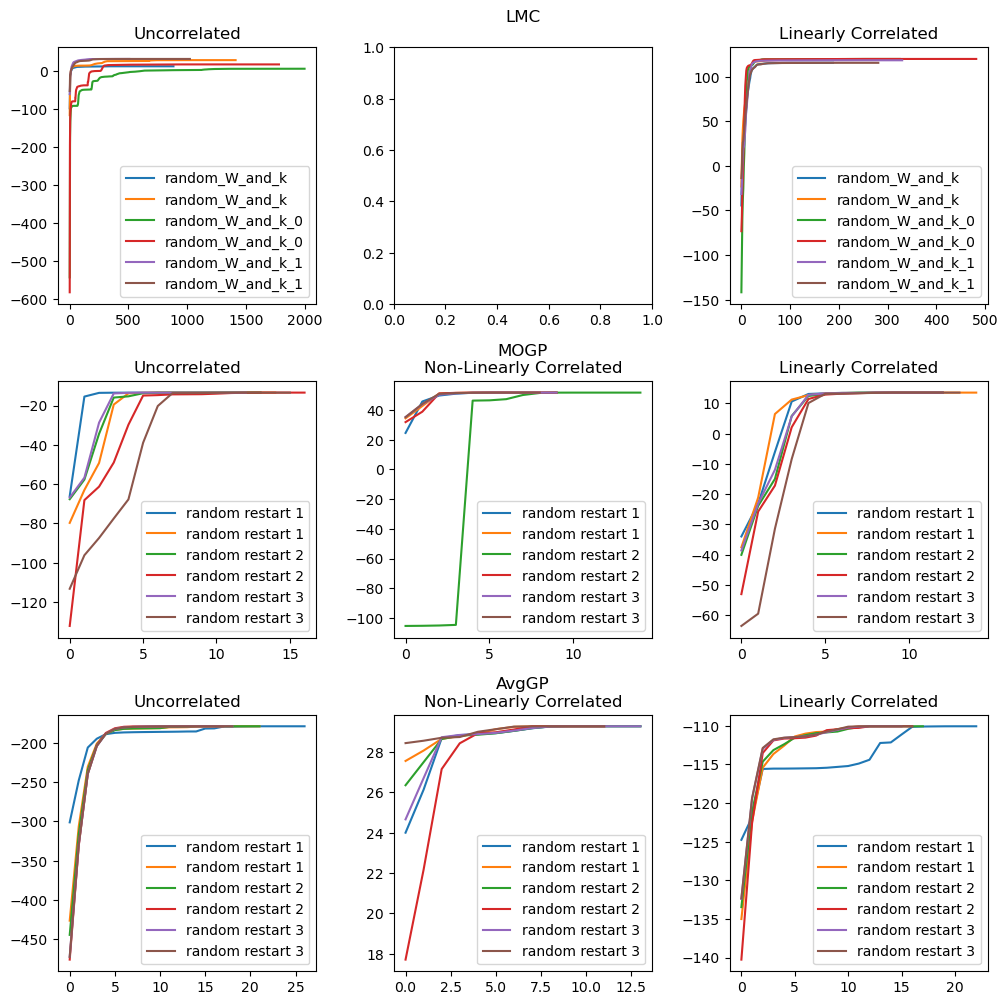

In [33]:
from matplotlib.gridspec import SubplotSpec
def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontsize=12)
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

fig, axs = plt.subplots(nrows=3, ncols=len(results_df['model'].unique()), figsize=(12, 12))
grid = plt.GridSpec(3, 3)

labels = {'mo_indi':{'random': 'random'},
          'lmc':{'lmc random_W_and_k': 'both W and $kappa$ random',
                 'lmc random_W_and_k_0': 'W random and $kappa=0$',
                 'lmc random_W_and_k_1': 'W random and $kappa=1$'},
          'lvmogp':{
          'random':'random',
          'gpy':'gpy',
                'mo_pca': 'PCA'},
          'avg':{'random'}}

surface_type_names = {'unrelated':'Uncorrelated','linear_relation':'Linearly Correlated',
                 'non-linear_relation':'Non-Linearly Correlated'}
mod_names = {'mo_indi':'MOGP', 'avg':'AvgGP', 'lmc': 'LMC', 'lvm':'LVMOGP'}

seed = 1
for i, model_name in enumerate(results_df['model'].unique()):
    for j, surface_type in enumerate(surface_types):
        df = results_df[(results_df['model'] == model_name) & (results_df['surface_type'] ==surface_type)
                        & (results_df['seed'] ==seed)]
        for init_type in df['init_type'].unique():
            for restart in df['restart'].unique():
                lml = df.loc[(df['init_type'] == init_type) & (df['restart'] == restart), 'lmls'].to_numpy()[0]
                axs[i, j].plot(range(len(lml)), lml, label=init_type)
                axs[i, j].set_title(surface_type_names[surface_type])
                axs[i, j].legend()
    create_subtitle(fig, grid[i, ::], f'{mod_names[model_name]}')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

In [48]:
results_df['final_lml'] = [results_df['lmls'].to_numpy()[i][-1] for i in range(len(results_df))]

In [48]:
fig, axs = plt.subplots(nrows=3, ncols=len(results_df['model'].unique()), figsize=(12, 12))
grid = plt.GridSpec(3, 3)


for i, model_name in enumerate(results_df['model'].unique()):
    for j, surface_type in enumerate(surface_types):
        df = results_df[(results_df['model'] == model_name) & (results_df['surface_type'] ==surface_type)]
        for init_type in df['init_type'].unique():
            for n_new_points in df['n_new_points'].unique():
                lmls = []
                temp_df = df.loc[(df['init_type'] == init_type)
                             & (df['n_new_points'] == n_new_points)]
                # lml = df.loc[(df['init_type'] == init_type)
                #              & (df['n_new_points'] == n_new_points), 'lmls']
                axs[i, j].plot(range(len(lml)), lml, label=init_type)
                axs[i, j].set_title(surface_type_names[surface_type])
                axs[i, j].legend()
    create_subtitle(fig, grid[i, ::], f'{mod_names[model_name]}')
plt.subplots_adjust(hspace=0.3, wspace=0.3)